In [0]:
import tensorflow as tf
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import argparse
import pdb
import easydict
from tqdm.notebook import tqdm
import os

In [0]:
def str2bool(v):
    if v.lower() in ('yes', 'true', 't', 'y', '1'):
        return True
    elif v.lower() in ('no', 'false', 'f', 'n', '0'):
        return False
    else:
        raise argparse.ArgumentTypeError('Boolean value expected.')

In [0]:
def plot_img(epoch, status, img_output, img_GT):
    plt.figure(figsize=(12,3))
    
    noise = tf.keras.layers.GaussianNoise(0.1, input_shape=(32, 32, 3))
    
    noise_input = np.expand_dims(img_GT, 0)
    noise_input = noise(noise_input, training=True)
    noise_input = noise_input[0]

    plt.subplot(1,3,1)
    img_GT = np.array(img_GT)
    plt.imshow((img_GT*255).astype(np.uint8))
    #plt.imshow(img_GT.astype(np.float64))
    plt.xlabel("{}, GT, Epoch: {}".format(status, epoch+1))
    
    plt.subplot(1,3,2)
    noise_input = np.array(noise_input)
    plt.imshow((noise_input*255).astype(np.uint8))
    #plt.imshow(noise_input.astype(np.float64))
    plt.xlabel("{}, Noise Input, Epoch: {}".format(status, epoch+1))
    
    plt.subplot(1,3,3)
    img_output = np.array(img_output)
    plt.imshow((img_output*255).astype(np.uint8))
    #plt.imshow(img_output.astype(np.float64))
    plt.xlabel("{}, Output, Epoch: {}".format(status, epoch+1))
    
    plt.show()

In [0]:
class DeNoise(Model):
	def __init__(self):
		super(DeNoise, self).__init__()
		self.conv1 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')
		self.conv2 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')
		self.conv3 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')
		self.conv4 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')
		self.last_conv = tf.keras.layers.Conv2D(3, 3, padding='same', activation=None)
	
	def call(self, x):
		x = self.conv1(x)
		x = self.conv2(x)
		x = self.conv3(x)
		x = self.conv4(x)
		x = self.last_conv(x)
		return x

In [0]:
if __name__ == "__main__":
    #os.environ["CUDA_VISIBLE_DEVICES"]="7"

    parser = argparse.ArgumentParser()
    parser.add_argument('--epoch', type=int, default=1000, help='number of epochs')
    parser.add_argument('--batch', type=int, default=1000, help='batch size')
    parser.add_argument('--lr', type=float, default=0.001, help='learning rate')
    parser.add_argument('--log_step', type=int, default=1, help='step for printing log')
    parser.add_argument('--img_show', type=str2bool, default=False, help='Show images while training')
    parser.add_argument('--inference', type=str2bool, default=True, help='Running inference code')
    parser.add_argument('--inf_img', type=str, default='', help='Path of inference input image')
    parser.add_argument('--output', type=str, default='', help='Path of inference result')

    #args = parser.parse_args()
    args = easydict.EasyDict({
        'epoch' : 100,
        'batch' : 32,
        'lr' : 0.001,
        'log_step' : 5,
        'img_show' : True,
        'inference' : True,
        'inf_img' : './noisy.png',
        'output' : './'
    })

    epochs = args.epoch
    BATCH_SIZE = args.batch
    lr = args.lr
    log_step = args.log_step

In [6]:
    # Load Data
    cifar10 = tf.keras.datasets.cifar10
    (x_train, _), (x_test, _) = cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train, y_test = x_train, x_test

    # Generate Dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(BATCH_SIZE)
    test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(BATCH_SIZE)

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
	# Generate Dataset
	train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(BATCH_SIZE)
	test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(10000).batch(BATCH_SIZE)

    # Generate Model
	model_1 = tf.keras.Sequential([
		tf.keras.layers.GaussianNoise(0.1, input_shape=(32, 32, 3)),
		DeNoise()
	])

	# Set Loss Function & Optimizer
	loss = tf.keras.losses.MeanSquaredError()
	optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

	train_loss = tf.keras.metrics.Mean(name='train_loss')
	test_loss = tf.keras.metrics.Mean(name='test_loss')

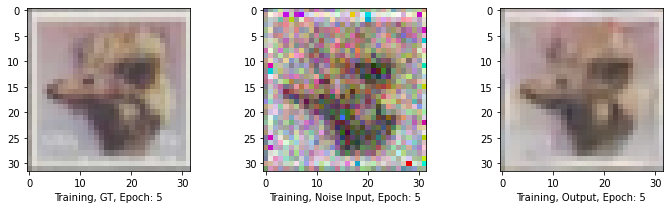

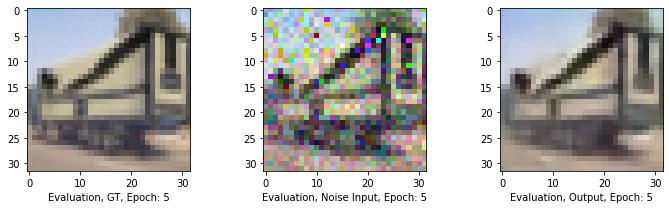

Epoch: 5 => train loss: 0.001796, test loss: 0.001496


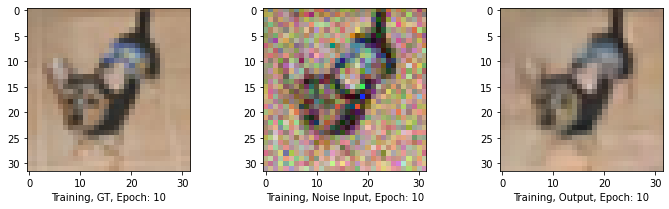

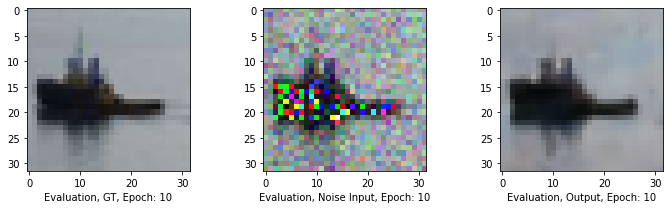

Epoch: 10 => train loss: 0.001631, test loss: 0.001469


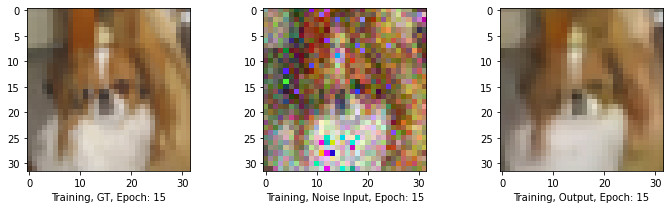

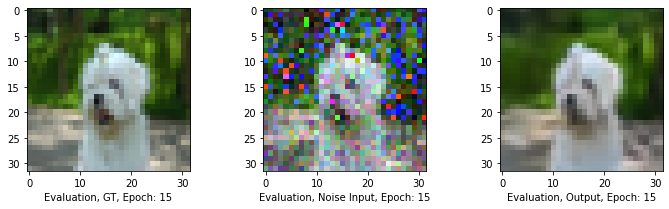

Epoch: 15 => train loss: 0.001563, test loss: 0.001444


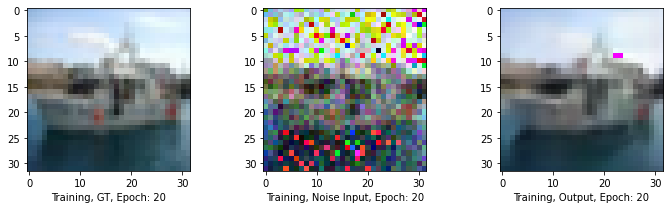

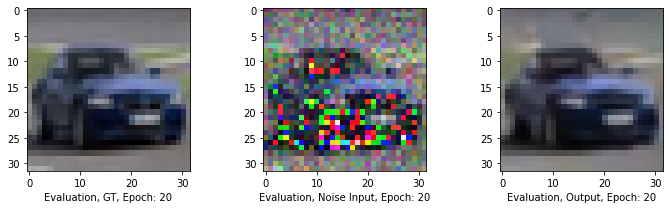

Epoch: 20 => train loss: 0.001524, test loss: 0.001432


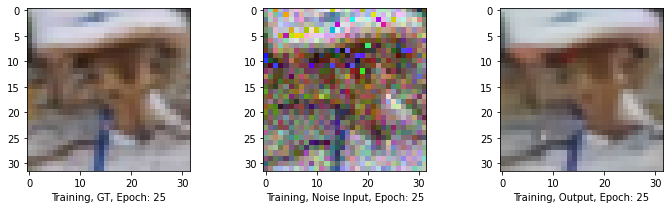

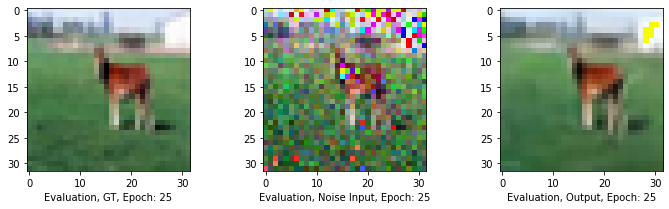

Epoch: 25 => train loss: 0.001498, test loss: 0.001424


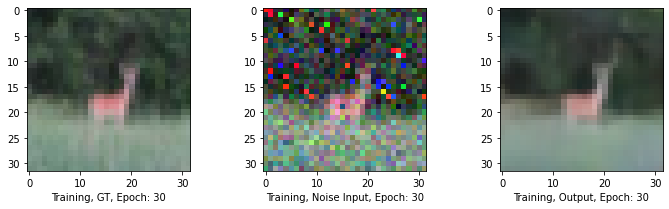

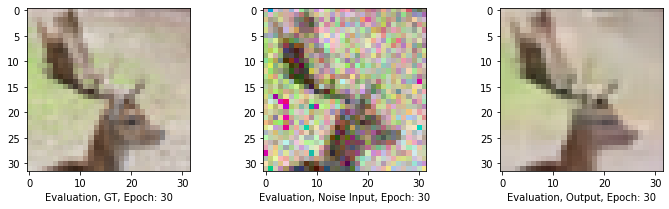

Epoch: 30 => train loss: 0.001480, test loss: 0.001417


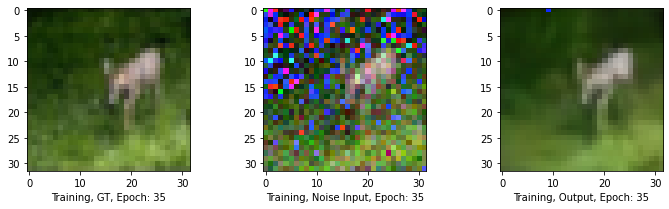

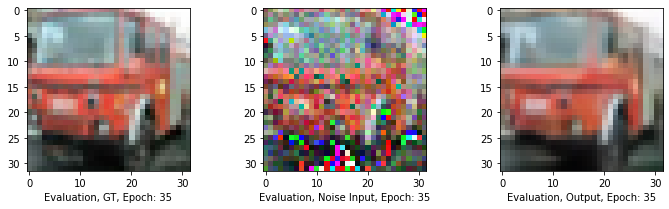

Epoch: 35 => train loss: 0.001466, test loss: 0.001410


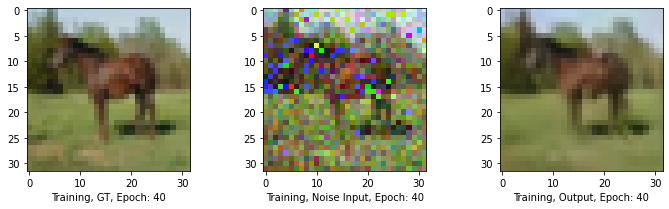

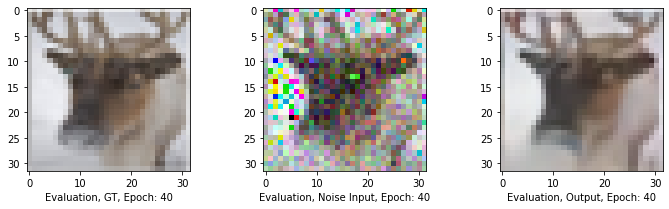

Epoch: 40 => train loss: 0.001456, test loss: 0.001405


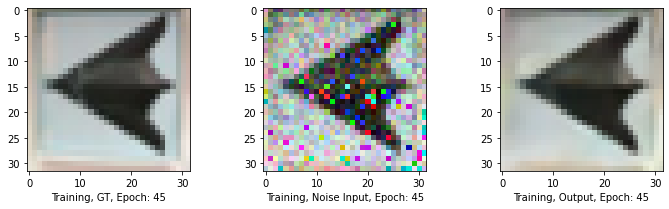

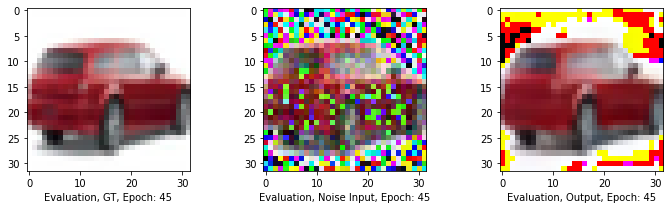

Epoch: 45 => train loss: 0.001447, test loss: 0.001402


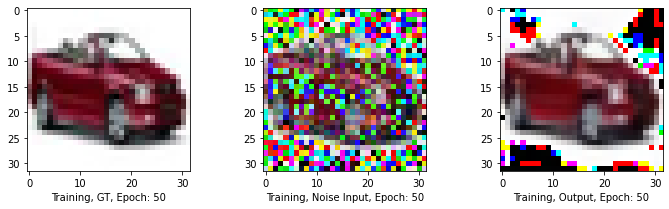

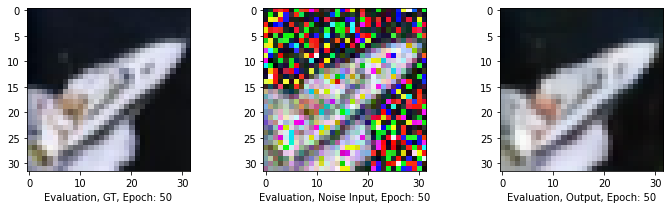

Epoch: 50 => train loss: 0.001440, test loss: 0.001400


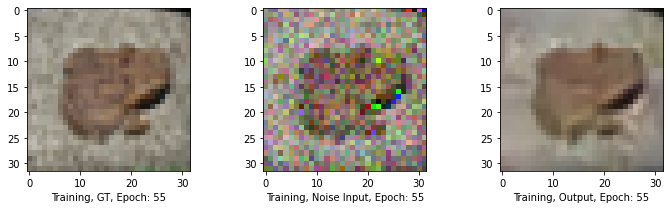

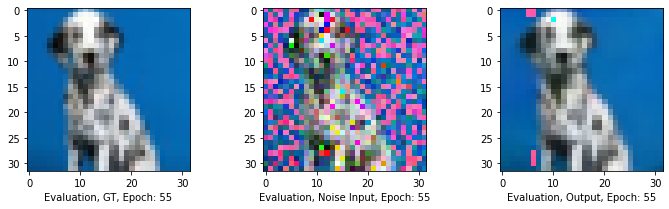

Epoch: 55 => train loss: 0.001434, test loss: 0.001397


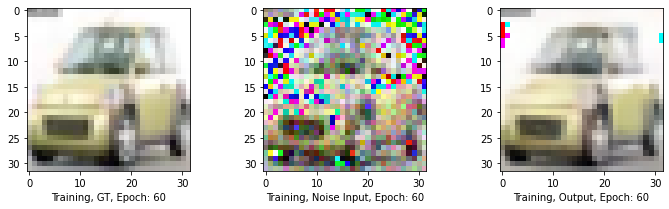

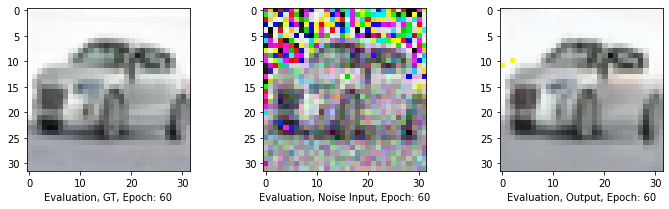

Epoch: 60 => train loss: 0.001429, test loss: 0.001395


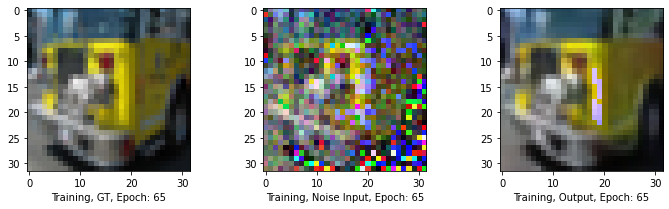

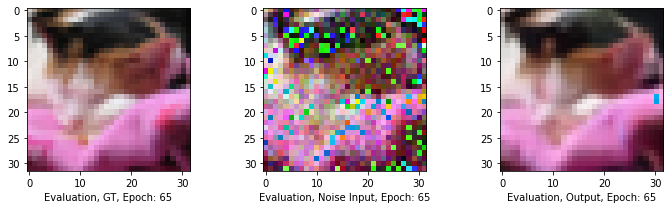

Epoch: 65 => train loss: 0.001425, test loss: 0.001398


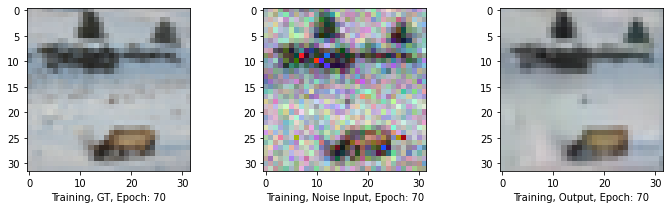

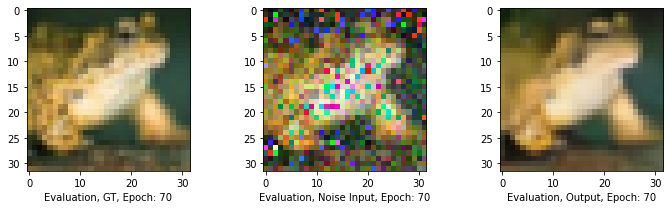

Epoch: 70 => train loss: 0.001421, test loss: 0.001396


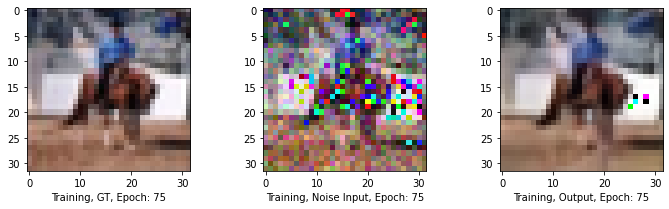

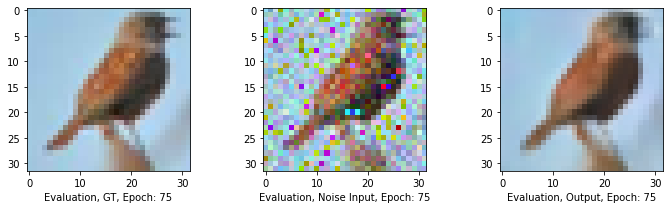

Epoch: 75 => train loss: 0.001418, test loss: 0.001394


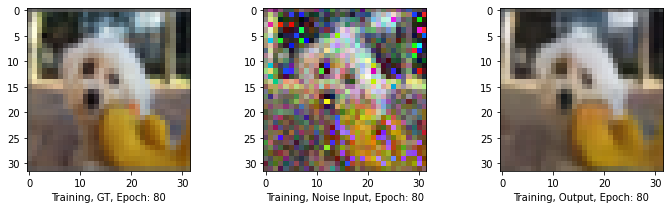

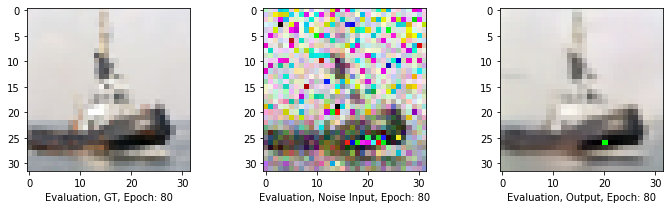

Epoch: 80 => train loss: 0.001415, test loss: 0.001393


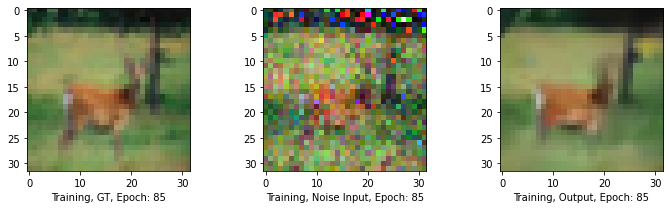

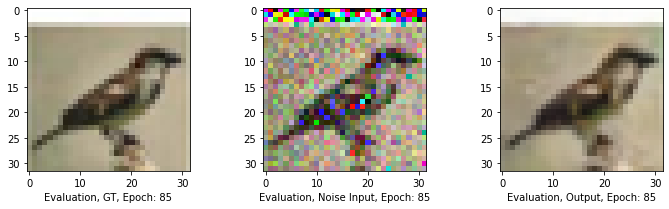

Epoch: 85 => train loss: 0.001412, test loss: 0.001391


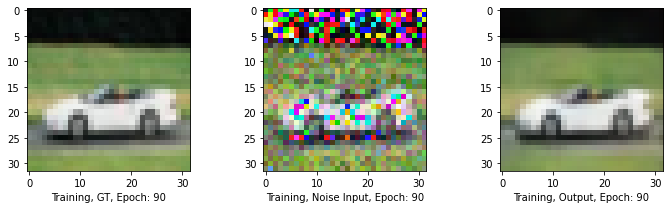

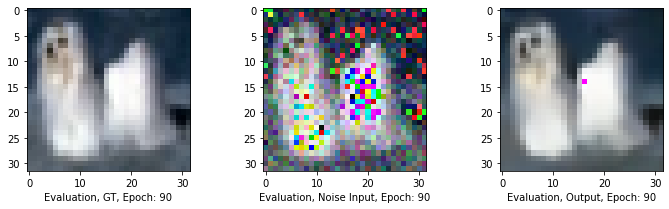

Epoch: 90 => train loss: 0.001410, test loss: 0.001390


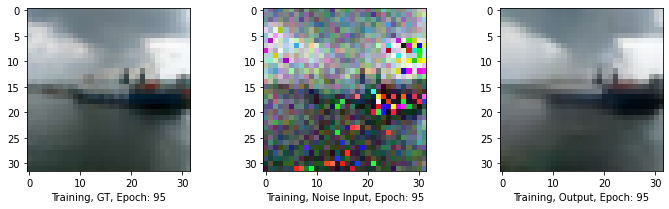

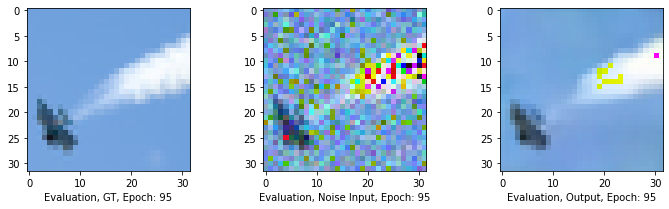

Epoch: 95 => train loss: 0.001407, test loss: 0.001388


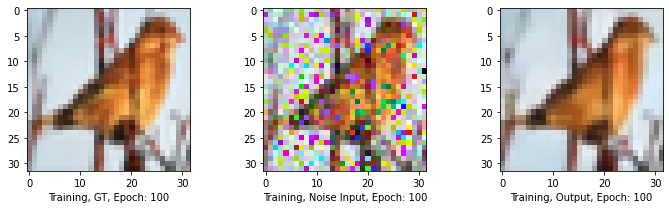

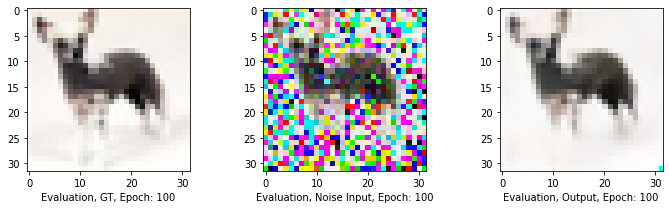

Epoch: 100 => train loss: 0.001405, test loss: 0.001387



In [8]:
	# Train & Evaluate
	tf.keras.backend.set_floatx('float64')
	for epoch in tqdm(range(epochs)):
		# Training
		for idx, (img_input, img_GT) in enumerate(train_dataset):
			with tf.GradientTape() as tape:
				img_output = model_1(img_input, training=True)
				t_loss = loss(img_GT, img_output)
			gradients = tape.gradient(t_loss, model_1.trainable_variables)
			optimizer.apply_gradients(zip(gradients, model_1.trainable_variables))

			train_loss(t_loss)
			if (epoch + 1) % args.log_step == 0 and idx == 0 and args.img_show:
				plot_img(epoch, 'Training', img_output[0], img_GT[0])


		if (epoch + 1) % args.log_step == 0:
			# Evaluation
			for idx, (test_img_input, test_img_GT) in enumerate(test_dataset):
				test_img_output = model_1(test_img_input, training=True)
				t_loss = loss(test_img_GT, test_img_output)

				test_loss(t_loss)
				if (epoch + 1) % args.log_step == 0 and idx == 0 and args.img_show:
					plot_img(epoch, 'Evaluation', test_img_output[0], test_img_GT[0])

			print('Epoch: %d => train loss: %.6f, test loss: %.6f'
					% (epoch+1, train_loss.result(), test_loss.result()))

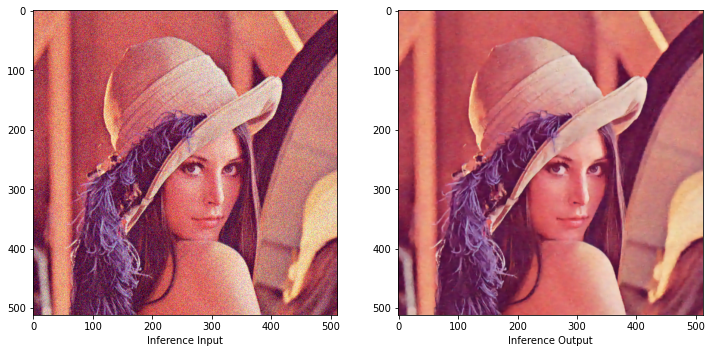

In [9]:
	# Inference
	if args.inference:
		inf_img_input = np.array(Image.open(args.inf_img))
		inf_img_input = np.expand_dims(inf_img_input, 0)
		inf_img_input = inf_img_input / 255.0

		inf_img_output = model_1(inf_img_input)

		if args.img_show:
			plt.figure(figsize=(12,6))
			plt.subplot(1,2,1) 
			plt.imshow((inf_img_input[0]*255).astype(np.uint8))
			plt.xlabel("Inference Input")

			inf_img_output = inf_img_output.numpy()
			plt.subplot(1,2,2)
			plt.imshow((inf_img_output[0]*255).astype(np.uint8))
			plt.xlabel("Inference Output")

		# Save Result
		inf_img_output = (inf_img_output[0]*255).astype(np.uint8)
		Image.fromarray(inf_img_output).save(args.output + 'result1.png')